In [1]:
import omicverse as ov
#import scvelo as scv
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

ov.ov_plot_set()


In [67]:
import omicverse as ov
ov.utils.ov_plot_set()
from matplotlib import rcParams

# 设置全局字体为Arial
rcParams['font.family'] = 'Arial'

In [11]:
import os
metric_li=[i for i in os.listdir('result') if ('metric' in i) and ('acgan' in i or 'btb' in i or 'cgan' in i)]

In [12]:
metric_li

['metric_acgan_dg.pkl',
 'metric_btb_dg.pkl',
 'metric_cgan_dg.pkl',
 'metric_acgan_hpc.pkl',
 'metric_btb_hpc.pkl',
 'metric_cgan_hpc.pkl']

In [5]:
metric_li

['metric_acgan_dg.pkl',
 'metric_btb_dg.pkl',
 'metric_cgan_dg.pkl',
 'metric_acgan_hpc.pkl',
 'metric_btb_hpc.pkl',
 'metric_cgan_hpc.pkl']

In [13]:
import pickle
metric_dict={}
for i in metric_li:
    with open(f'result/{i}','rb') as f:
        metric_dict[i.split('.')[0]]=pickle.load(f)

In [14]:
plot_data=pd.DataFrame(columns=['dataset','model','Cor_mean','non_Cor_mean',
                               'Cos_mean','non_Cos_mean','Trans_raw','Trans_after',
                               'Var_raw','Var_after'])
for i in metric_dict.keys():
    test_li=[i.split('_')[-1],i.split('_')[-2]]+list(metric_dict[i].values())
    plot_data.loc[i]=test_li

In [15]:
plot_data.loc[['metric_acgan_hpc','metric_btb_hpc','metric_cgan_hpc'],'Trans_raw']=0

In [16]:
plot_data['Trans_dif']=plot_data['Trans_after'].values-plot_data['Trans_raw'].values
plot_data['Var_dif']=plot_data['Var_after'].values-plot_data['Var_raw'].values

In [17]:
plot_data['Cor_unique']=plot_data['Cor_mean'].values-plot_data['non_Cor_mean'].values
plot_data['Cos_unique']=plot_data['Cos_mean'].values-plot_data['non_Cos_mean'].values

In [18]:
plot_data=plot_data.loc[['metric_acgan_dg', 'metric_cgan_dg', 'metric_btb_dg',
       'metric_acgan_hpc', 'metric_cgan_hpc','metric_btb_hpc']]

In [19]:
plot_data['model_full']=plot_data['model'].map(
    {'acgan':'ACGAN','cgan':'CGAN','btb':'BulkTrajBlend',}
)

In [20]:
plot_data['dataset_full']=plot_data['dataset'].map(
    {'dg':'Dentategyrus','hpc':'Hematopoietic'}
)

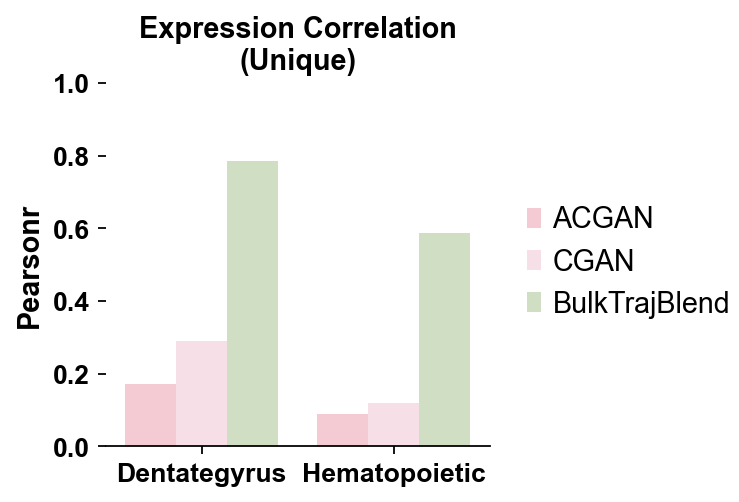

In [47]:
import seaborn as sns
#sns.set_theme(style="whitegrid")

#penguins = pd.read_csv('penguins.csv')
#fig, ax = plt.subplots(figsize=(4,3))
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=plot_data, kind="bar",
    x="dataset_full", y="Cor_unique", hue="model_full",
    errorbar="sd", #palette="dark", 
    alpha=.6, height=4, 
    palette=['#fa9daf','#fac4d5','#b0d097']
    
)
g.despine(left=True)
g.set_axis_labels("", "Pearsonr",fontsize=13,fontweight='bold')
g.legend.set_title("")
g.legend.set_bbox_to_anchor((1.35,0.5))
g.fig.set_size_inches(3.5, 3)
g.set_xticklabels(fontsize=12,fontweight='bold')
g.set_yticklabels(fontsize=12,fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.title('Expression Correlation\n(Unique)',fontsize=13,fontweight='bold')

plt.savefig('figures/metric/bar_cor.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/metric/bar_cor.pdf',dpi=300,bbox_inches='tight')


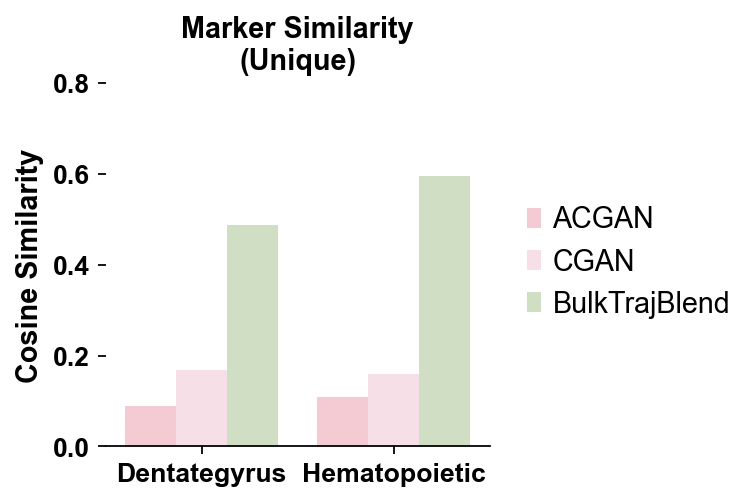

In [32]:
import seaborn as sns
#sns.set_theme(style="whitegrid")

#penguins = pd.read_csv('penguins.csv')
#fig, ax = plt.subplots(figsize=(4,3))
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=plot_data, kind="bar",
    x="dataset_full", y="Cos_unique", hue="model_full",
    errorbar="sd", #palette="dark", 
    alpha=.6, height=4, 
    palette=['#fa9daf','#fac4d5','#b0d097']
    
)
g.despine(left=True)
g.set_axis_labels("", "Cosine Similarity",fontsize=13,fontweight='bold')
g.legend.set_title("")
g.legend.set_bbox_to_anchor((1.35,0.5))
g.fig.set_size_inches(3.5, 3)
g.set_xticklabels(fontsize=12,fontweight='bold')
g.set_yticklabels(fontsize=12,fontweight='bold')
plt.tight_layout()
plt.grid(False)
plt.title('Marker Similarity\n(Unique)',fontsize=13,fontweight='bold')

plt.savefig('figures/metric/bar_cos.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/metric/bar_cos.pdf',dpi=300,bbox_inches='tight')


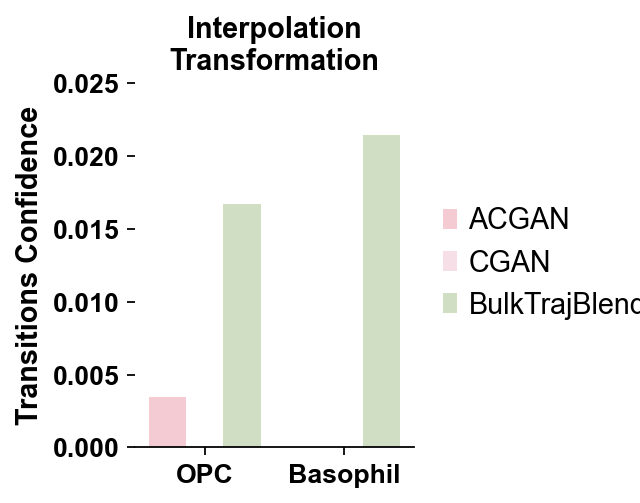

In [46]:
import seaborn as sns
#sns.set_theme(style="whitegrid")

#penguins = pd.read_csv('penguins.csv')
#fig, ax = plt.subplots(figsize=(4,3))
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=plot_data, kind="bar",
    x="dataset_full", y="Trans_dif", hue="model_full",
    errorbar="sd", #palette="dark", 
    alpha=.6, height=4, 
    palette=['#fa9daf','#fac4d5','#b0d097']
    
)
g.despine(left=True)
g.set_axis_labels("", "Transitions Confidence",fontsize=13,fontweight='bold')
g.legend.set_title("")
g.legend.set_bbox_to_anchor((1.4,0.5))
g.fig.set_size_inches(3, 3)
g.set_xticklabels(['OPC','Basophil'],fontsize=12,fontweight='bold')
g.set_yticklabels(fontsize=12,fontweight='bold')
plt.tight_layout()
plt.grid(False)
plt.ylim(0,0.025)
#plt.ylim(-0.01,0.05)
plt.title('Interpolation\nTransformation',fontsize=13,fontweight='bold')

plt.savefig('figures/metric/bar_trans.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/metric/bar_trans.pdf',dpi=300,bbox_inches='tight')


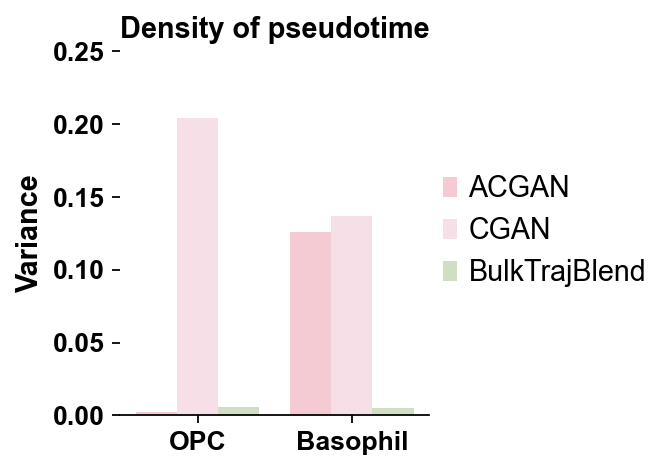

In [34]:
import seaborn as sns
#sns.set_theme(style="whitegrid")

#penguins = pd.read_csv('penguins.csv')
#fig, ax = plt.subplots(figsize=(4,3))
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=plot_data, kind="bar",
    x="dataset_full", y="Var_dif", hue="model_full",
    errorbar="sd", #palette="dark", 
    alpha=.6, height=4, 
    palette=['#fa9daf','#fac4d5','#b0d097']
    
)
g.despine(left=True)
g.set_axis_labels("", "Variance",fontsize=13,fontweight='bold')
g.legend.set_title("")
g.legend.set_bbox_to_anchor((1.4,0.5))
g.fig.set_size_inches(3, 3)
g.set_xticklabels(['OPC','Basophil'],fontsize=12,fontweight='bold')
g.set_yticklabels(fontsize=12,fontweight='bold')
plt.tight_layout()
plt.grid(False)
plt.title('Density of pseudotime',fontsize=13,fontweight='bold')

plt.savefig('figures/metric/bar_var.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/metric/bar_var.pdf',dpi=300,bbox_inches='tight')


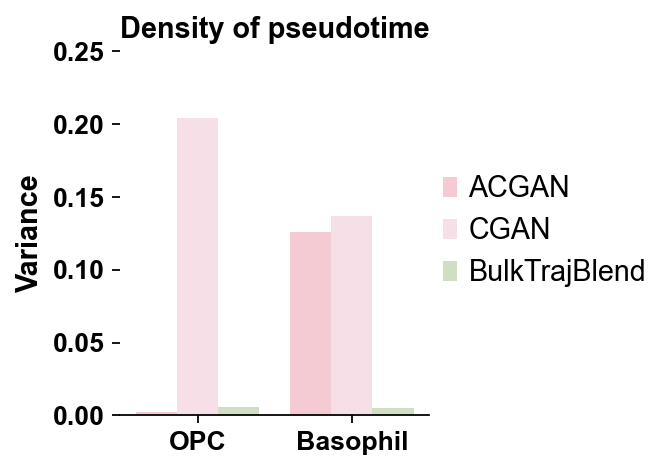

In [42]:
import seaborn as sns
#sns.set_theme(style="whitegrid")

#penguins = pd.read_csv('penguins.csv')
#fig, ax = plt.subplots(figsize=(4,3))
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=plot_data, kind="bar",
    x="dataset_full", y="Var_dif", hue="model_full",
    errorbar="sd", #palette="dark", 
    alpha=.6, height=4, 
    palette=['#fa9daf','#fac4d5','#b0d097']
    
)
g.despine(left=True)
g.set_axis_labels("", "Variance",fontsize=13,fontweight='bold')
g.legend.set_title("")
g.legend.set_bbox_to_anchor((1.4,0.5))
g.legend.set(ncols=3)
g.fig.set_size_inches(3, 3)
g.set_xticklabels(['OPC','Basophil'],fontsize=12,fontweight='bold')
g.set_yticklabels(fontsize=12,fontweight='bold')
plt.tight_layout()
plt.grid(False)
plt.title('Density of pseudotime',fontsize=13,fontweight='bold')

plt.savefig('figures/metric/bar_var1.png',dpi=300,bbox_inches='tight')
plt.savefig('pdf/metric/bar_var1.pdf',dpi=300,bbox_inches='tight')
